In [72]:
# We've come into a well known data science problem. We have an imbalanced data set. Of the roughly 11000 cases we are looking at, 9000 entries are "Suspected Minor
# Injury" or "Possible Injury" and only 750 entries combined from both "Killed" and "Seriously Injured." This will bias our models towards always predicting minor
# injuries. From all of this we really want to be able to predict what make for dangerous road conditions for cyclists. 

# To deal with this, I am going to try oversampling the data with SMOTE.

In [73]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [74]:
data = '/home/wbrave1/Desktop/erdos/Bicycle-Safety/data/NCDOT_BikePedCrash.csv'

BikeCrash = pd.read_csv(data)

features = ['BikeInjury', 'CrashHour', 'CrashDay', 'CrashMonth', 'Weather', 'RdConfig']

BikeCrashTrunc = BikeCrash[features]


In [75]:
MonthMapping = {'January': 1,
                'February': 2,
                'March': 3,
                'April': 4,
                'May': 5,
                'June': 6,
                'July': 7,
                'August': 8,
                'September': 9,
                'October': 10,
                'November': 11,
                'December': 12}

BikeCrashTrunc['CrashMonth'] = BikeCrashTrunc['CrashMonth'].map(MonthMapping)

/tmp/ipykernel_148693/784253329.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BikeCrashTrunc['CrashMonth'] = BikeCrashTrunc['CrashMonth'].map(MonthMapping)


In [76]:
WeekdayMapping = {'Monday': 1,
                  'Tuesday': 2,
                  'Wednesday': 3,
                  'Thursday': 4,
                  'Friday': 5,
                  'Saturday': 6,
                  'Sunday': 7}

BikeCrashTrunc['CrashDay'] = BikeCrashTrunc['CrashDay'].map(WeekdayMapping)

/tmp/ipykernel_148693/2197673485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BikeCrashTrunc['CrashDay'] = BikeCrashTrunc['CrashDay'].map(WeekdayMapping)


In [77]:
BikeCrashTrunc = BikeCrashTrunc.drop(BikeCrashTrunc[BikeCrashTrunc.BikeInjury == 'Unknown Injury'].index)
BikeCrashTrunc = BikeCrashTrunc.drop(BikeCrashTrunc[BikeCrashTrunc.RdConfig == 'Unknown'].index)

In [78]:
# In case you want binary categories

BikeCrashTrunc = BikeCrashTrunc.replace(['O: No Injury', 'B: Suspected Minor Injury', 'C: Possible Injury', 'A: Suspected Serious Injury', 'K: Killed'], ['Minor Injury', 'Minor Injury', 'Minor Injury', 'Serious Injury', 'Serious Injury'])

In [79]:
BikeCrashTrunc = pd.get_dummies(BikeCrashTrunc, columns = ['Weather'], dtype=float)
BikeCrashTrunc = pd.get_dummies(BikeCrashTrunc, columns = ['RdConfig'], dtype=float)

In [80]:
from sklearn.datasets import make_classification

In [81]:
X = BikeCrashTrunc.iloc[:, 1:]
y = BikeCrashTrunc.iloc[:, 0]

In [82]:
oversample = SMOTE(random_state=42)

In [83]:
print('Original X and y shapes: ', X.shape, y.shape)

Original X and y shapes:  (10800, 13) (10800,)


In [84]:
#X_res, y_res = oversample.fit_resample(X, y)

In [85]:
#print('Reshaped X and y:', X_res.shape, y_res.shape)

In [86]:
dtc = DecisionTreeClassifier(max_depth=5)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=216)

In [88]:
X_train_resample, y_train_resample = oversample.fit_resample(X_train, y_train)

In [89]:
dtc.fit(X_train_resample, y_train_resample)

DecisionTreeClassifier()

In [90]:
y_pred = dtc.predict(X_test)

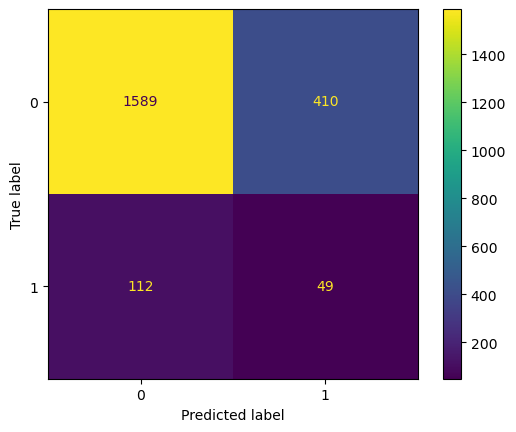

In [91]:
# In case you want binary categories

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=['Minor Injury', 'Serious Injury'])).plot()

# In case you want all 5 categories

#ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=['O: No Injury','B: Suspected Minor Injury','C: Possible Injury','A: Suspected Serious Injury','K: Killed'])).plot()

In [92]:
# In case you want binary categories

print(classification_report(y_test, y_pred, target_names=['Minor Injury', 'Serious Injury']))

# In case you want all 5 categories

#print(classification_report(y_test, y_pred, labels=['O: No Injury','B: Suspected Minor Injury','C: Possible Injury','A: Suspected Serious Injury','K: Killed']))

                precision    recall  f1-score   support

  Minor Injury       0.93      0.79      0.86      1999
Serious Injury       0.11      0.30      0.16       161

      accuracy                           0.76      2160
     macro avg       0.52      0.55      0.51      2160
  weighted avg       0.87      0.76      0.81      2160



In [93]:
pd.DataFrame({'feature_importance_score':dtc.feature_importances_}, index = X.columns).sort_values('feature_importance_score',
                                                ascending=False)

,feature_importance_score
CrashHour,0.232965
CrashMonth,0.217267
"RdConfig_Two-Way, Not Divided",0.200533
CrashDay,0.187143
Weather_Clear,0.116201
"RdConfig_Two-Way, Divided, Unprotected Median",0.015838
Weather_Rain,0.011512
Weather_Cloudy,0.010152
"RdConfig_One-Way, Not Divided",0.003328
"RdConfig_Two-Way, Divided, Positive Median Barrier",0.002495


In [94]:
train_tree_pred = dtc.predict(X_train)
test_tree_pred = dtc.predict(X_test)

print(f"Test accuracy:", accuracy_score(y_test, test_tree_pred))
print(f"Training accuracy:", accuracy_score(y_train, train_tree_pred))

Test accuracy: 0.7583333333333333
Training accuracy: 0.8293981481481482


In [95]:
cv_scores = cross_val_score(dtc, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.88935185 0.89768519 0.89074074 0.89398148 0.88564815]
Mean cross-validation score: 0.8914814814814814
